# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# [教學目標]

- 以下程式碼將示範如何繪製各種分布圖, 更直覺地看出單一變數本身的分布情形

- 分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖), 提供兩種不同感受

- 順便熟悉 matplotlib 的幾種繪圖設定

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')
dir_path = 'C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'

In [3]:
f_app = os.path.join(dir_path,'application_train.csv')
print(f'Path of read: {f_app}')
app_train = pd.read_csv(f_app)
app_train.head()

Path of read: C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

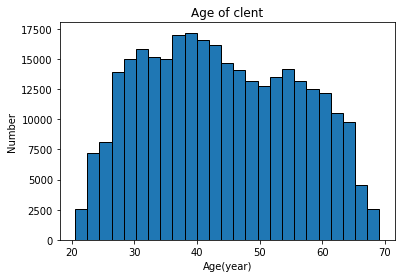

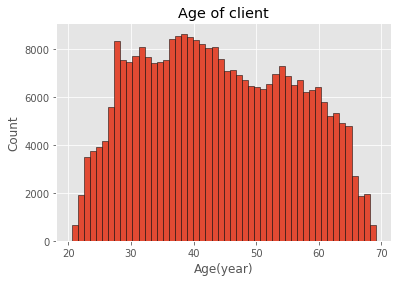

In [5]:
#以生存年數繪製分布圖
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25 )
plt.title('Age of clent') ; plt.xlabel('Age(year)') ; plt.ylabel('Number')
plt.show()

# 改變繪圖樣式 (style)
plt.style.use('ggplot')

# 改變樣式後再繪圖一次, 比較效果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 50)
plt.title('Age of client') ; plt.xlabel('Age(year)') ; plt.ylabel('Count')
plt.show()

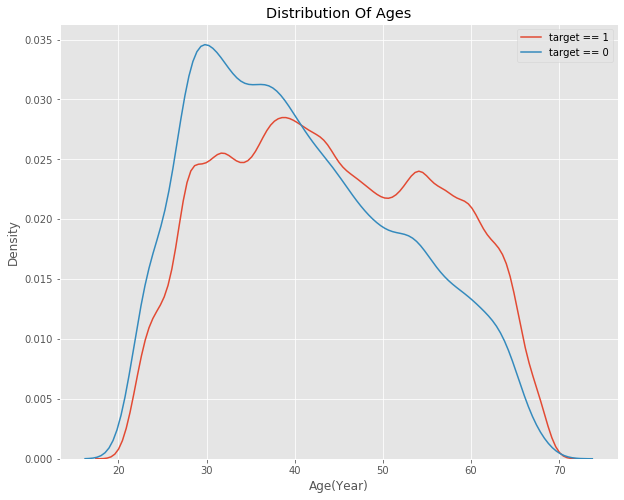

In [6]:
# 設定繪圖區域的長與寬
plt.figure(figsize = (10,8))

# Kenel Density Estimation (KDE) plot: 會準時還貸者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0,'DAYS_BIRTH'] / 365 ,label = 'target == 1')

# KDE plot: 不會準時還貸者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1,'DAYS_BIRTH'] / 365,label = 'target == 0')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age(Year)'),plt.ylabel('Density'),plt.title('Distribution Of Ages')

# 輸出繪圖 : 有的ipynb環境, 會在一格結束時自動輸出繪圖, 但加上這行能保證在不同環境都會畫出圖形
plt.show()


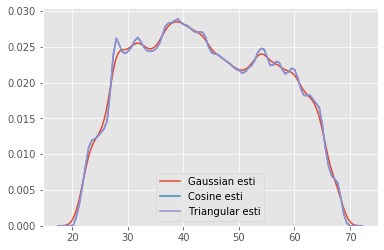

In [7]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365 , label = 'Gaussian esti', kernel = 'gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0,'DAYS_BIRTH'] / 365 , label = 'Cosine esti', kernel = 'cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0 ,'DAYS_BIRTH'] / 365,label = 'Triangular esti', kernel = 'tri')

plt.show()

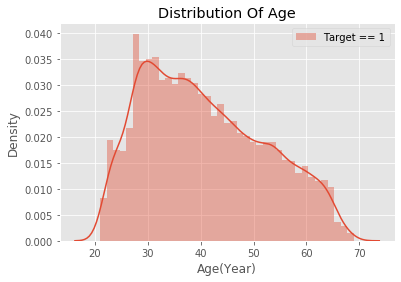

In [8]:
# 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Target == 1')
plt.legend()
plt.title('Distribution Of Age');plt.xlabel('Age(Year)');plt.ylabel('Density')
plt.show()

## It's your turn
## 除了直接觀察變項以外，我們也可以分群比較
自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)

以年齡區間為 x, target 為 y 繪製 barplot

In [9]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [10]:
age_data = app_train[['DAYS_BIRTH','TARGET']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
print(age_data['YEARS_BIRTH'])

bin_cut = np.arange(20,70.0000000001,5)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut)
#顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: YEARS_BIRTH, Length: 307511, dtype: float64
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


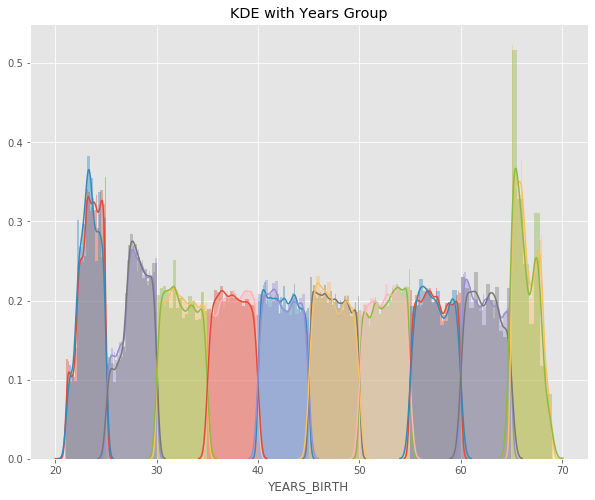

In [48]:
# 繪圖前先排序 / 分
'''
print(sorted(age_data['YEARS_BINNED'].unique()))
print(type(sorted(age_data['YEARS_BINNED'].unique())))
print(np.sort(age_data['YEARS_BINNED'].unique()))
print(type(np.sort(age_data['YEARS_BINNED'].unique())))
'''

plt.figure(figsize = (10,8))

sorted_years_group = sorted(age_data['YEARS_BINNED'].unique())
for i in range(len(sorted_years_group)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == sorted_years_group[i])  \
                                & (age_data['TARGET'] == 0) ,'YEARS_BIRTH'], label = str(sorted_years_group[i]) )
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == sorted_years_group[i]) \
                            & (age_data['TARGET'] == 1),'YEARS_BIRTH'] ,label = str(sorted_years_group[i]) )
    
    plt.title('KDE with Years Group')
    plt.show



In [73]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_group = age_data.groupby('YEARS_BINNED').mean()
print(age_group)

                DAYS_BIRTH    TARGET  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]   8532.795625  0.123036    23.377522
(25.0, 30.0]  10155.219250  0.111436    27.822518
(30.0, 35.0]  11854.848377  0.102814    32.479037
(35.0, 40.0]  13707.908253  0.089414    37.555913
(40.0, 45.0]  15497.661233  0.078491    42.459346
(45.0, 50.0]  17323.900441  0.074171    47.462741
(50.0, 55.0]  19196.494791  0.066968    52.593136
(55.0, 60.0]  20984.262742  0.055314    57.491131
(60.0, 65.0]  22780.547460  0.052737    62.412459
(65.0, 70.0]  24292.614340  0.037270    66.555108


In [ ]:
# 以年齡區間為 x, target 為 y 繪製 barplot

Text(0.5, 1.0, 'Failure to repay by Age group')

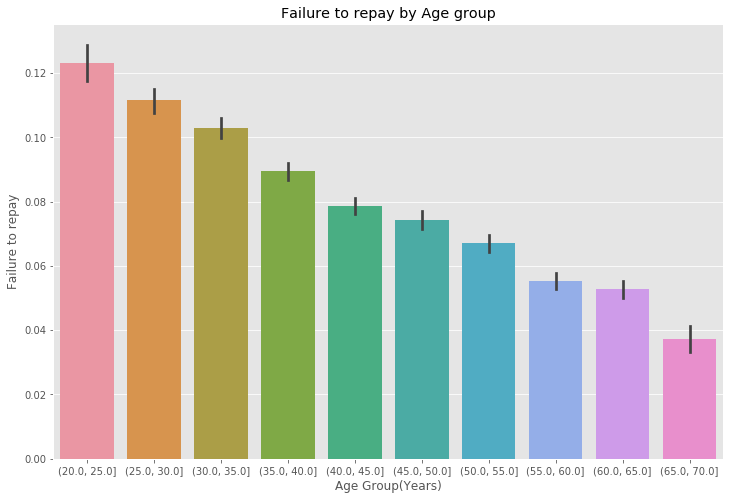

In [81]:
plt.figure(figsize = (12,8))
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px,py)
plt.show

plt.xlabel('Age Group(Years)'),plt.ylabel('Failure to repay')
plt.title('Failure to repay by Age group')

Text(0.5, 1.0, 'Failure to repay by Age group')

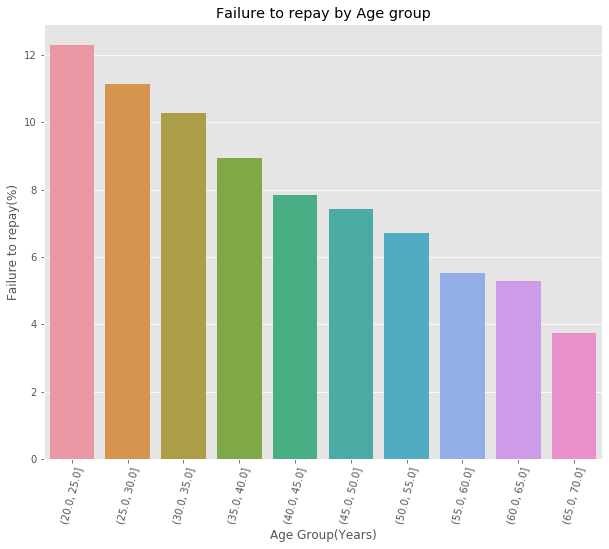

In [91]:
plt.figure(figsize = (10,8))
px = age_group.index.astype(str)
py = 100*age_group['TARGET']
sns.barplot(px,py)
plt.show

#plt.xtick => 調整 X 項文字的傾斜度
plt.xlabel('Age Group(Years)'),plt.ylabel('Failure to repay(%)'),plt.xticks(rotation = 75)
plt.title('Failure to repay by Age group')

Index(['(20.0, 25.0]', '(25.0, 30.0]', '(30.0, 35.0]', '(35.0, 40.0]',
       '(40.0, 45.0]', '(45.0, 50.0]', '(50.0, 55.0]', '(55.0, 60.0]',
       '(60.0, 65.0]', '(65.0, 70.0]'],
      dtype='object', name='YEARS_BINNED')